<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/maddie_david_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("NHANES")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(NHANES)
library(tidyverse)
data(NHANES)

In [5]:
NHANES %>% colnames

[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeDecade"        "AgeMonths"        "Race1"            "Race3"           
 [9] "Education"        "MaritalStatus"    "HHIncome"         "HHIncomeMid"     
[13] "Poverty"          "HomeRooms"        "HomeOwn"          "Work"            
[17] "Weight"           "Length"           "HeadCirc"         "Height"          
[21] "BMI"              "BMICatUnder20yrs" "BMI_WHO"          "Pulse"           
[25] "BPSysAve"         "BPDiaAve"         "BPSys1"           "BPDia1"          
[29] "BPSys2"           "BPDia2"           "BPSys3"           "BPDia3"          
[33] "Testosterone"     "DirectChol"       "TotChol"          "UrineVol1"       
[37] "UrineFlow1"       "UrineVol2"        "UrineFlow2"       "Diabetes"        
[41] "DiabetesAge"      "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad" 
[45] "LittleInterest"   "Depressed"        "nPregnancies"     "nBabies"         
[49] "Age1stBaby"       "SleepHrsNight"    "SleepTrouble"     "PhysActive"      
[53] "PhysActiveDays"   "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"   
[57] "CompHrsDayChild"  "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
[61] "SmokeNow"         "Smoke100"         "Smoke100n"        "SmokeAge"        
[65] "Marijuana"        "AgeFirstMarij"    "RegularMarij"     "AgeRegMarij"     
[69] "HardDrugs"        "SexEver"          "SexAge"           "SexNumPartnLife" 
[73] "SexNumPartYear"   "SameSex"          "SexOrientation"   "PregnantNow"

# FILTER DIASTOLIC > 0

In [9]:
df <- NHANES %>% select(TVHrsDay, BMI, BPSysAve, BPDiaAve, TotChol) %>% drop_na

`geom_smooth()` using formula = 'y ~ x'


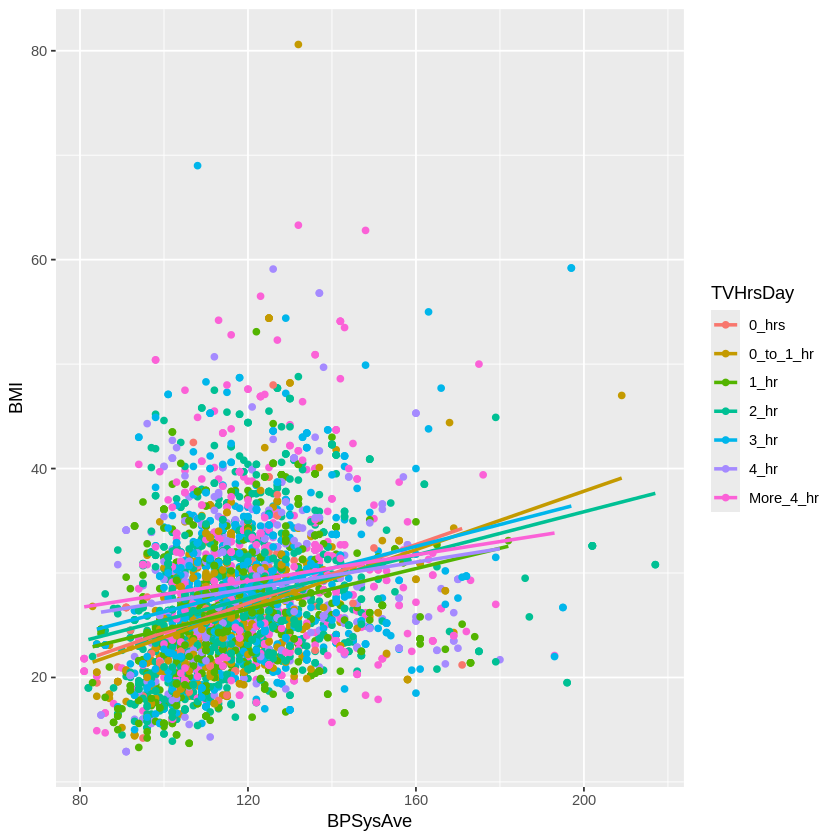

In [38]:
df %>% ggplot(aes(y=BMI, x=BPSysAve, color=TVHrsDay)) + geom_point() + geom_smooth(method="lm", se=FALSE)

Warning message:
“Failed to fit group 1.
Caused by error:
! object 'TVHrsDay' not found”
Warning message:
“Failed to fit group 2.
Caused by error:
! object 'TVHrsDay' not found”
Warning message:
“Failed to fit group 3.
Caused by error:
! object 'TVHrsDay' not found”
Warning message:
“Failed to fit group 4.
Caused by error:
! object 'TVHrsDay' not found”
Warning message:
“Failed to fit group 5.
Caused by error:
! object 'TVHrsDay' not found”
Warning message:
“Failed to fit group 6.
Caused by error:
! object 'TVHrsDay' not found”
Warning message:
“Failed to fit group 7.
Caused by error:
! object 'TVHrsDay' not found”


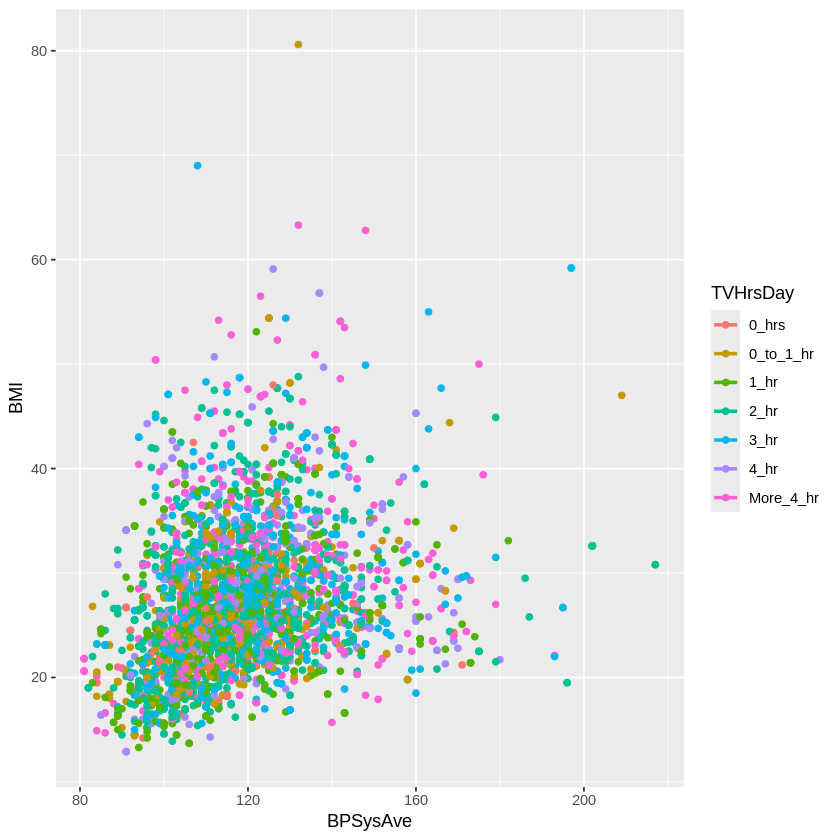

In [39]:
df %>%
  ggplot(aes(x = BPSysAve, y = BMI, color = TVHrsDay)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE,
              formula = y ~ x + TVHrsDay)

In [23]:
model1 <- lm(BMI ~ TVHrsDay + BPSysAve + BPDiaAve + TotChol, data=df)
summary(model1)


Call:
lm(formula = BMI ~ TVHrsDay + BPSysAve + BPDiaAve + TotChol, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.209  -4.569  -0.978   3.446  52.365 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.314502   1.042536  11.812  < 2e-16 ***
TVHrsDay0_to_1_hr -0.613550   0.760570  -0.807  0.41989    
TVHrsDay1_hr      -0.416301   0.743678  -0.560  0.57566    
TVHrsDay2_hr       0.533189   0.731377   0.729  0.46603    
TVHrsDay3_hr       1.603517   0.743888   2.156  0.03118 *  
TVHrsDay4_hr       1.566517   0.767929   2.040  0.04142 *  
TVHrsDayMore_4_hr  2.433227   0.757976   3.210  0.00134 ** 
BPSysAve           0.059021   0.006775   8.711  < 2e-16 ***
BPDiaAve           0.092525   0.008099  11.425  < 2e-16 ***
TotChol            0.231692   0.100773   2.299  0.02155 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.439 on 3949 degrees of freedom
Multiple R-squared:  

In [42]:
df %>% filter(BPDiaAve == 0)

TVHrsDay,BMI,BPSysAve,BPDiaAve,TotChol
<fct>,<dbl>,<int>,<int>,<dbl>
More_4_hr,14.9,84,0,4.50
2_hr,19.1,111,0,2.43
More_4_hr,35.8,127,0,3.03
0_to_1_hr,14.4,93,0,4.32
More_4_hr,21.6,126,0,7.16
More_4_hr,21.6,126,0,7.16
0_to_1_hr,18.4,115,0,3.05
2_hr,17.4,116,0,4.29
2_hr,18.6,106,0,5.53


`geom_smooth()` using formula = 'y ~ x'


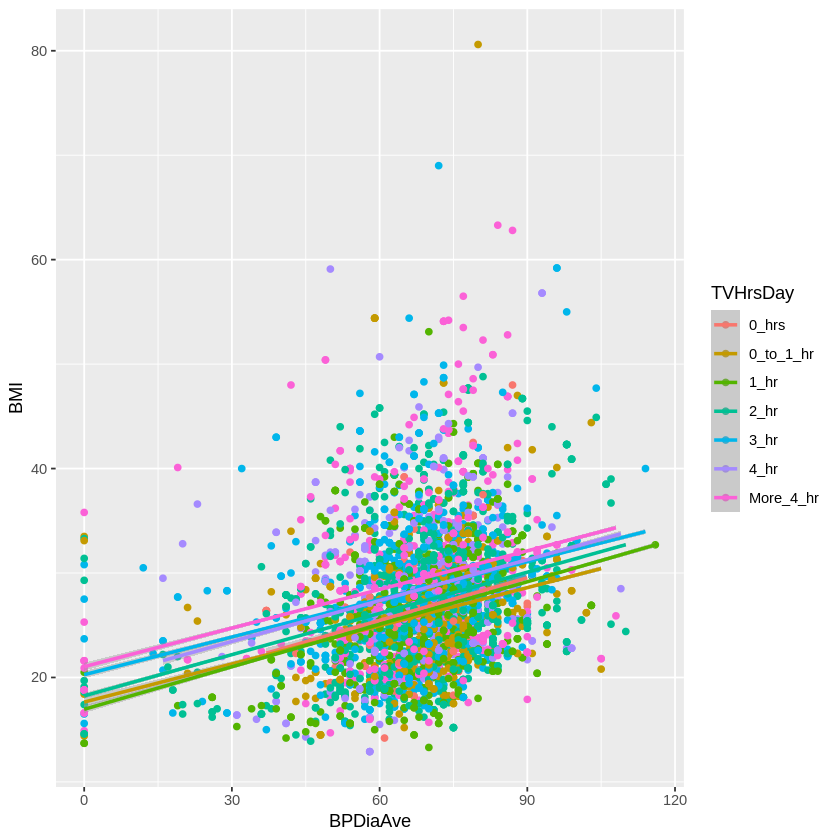

In [41]:
model1 %>%
fortify(model1$model) %>%
ggplot(aes(x = BPDiaAve, y = BMI, color = TVHrsDay)) +
geom_point() +
geom_smooth(aes(y = .fitted), method="lm")

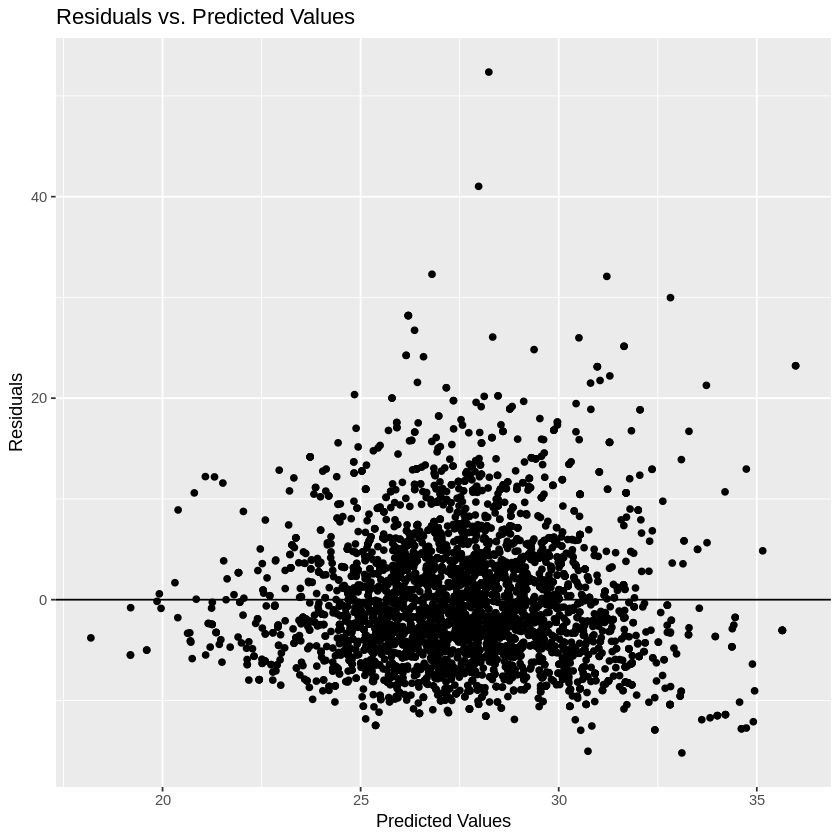

In [24]:
model1 %>%
  fortify(model1$model) %>%
  ggplot(aes(x = .fitted,
             y = .resid)) +
  geom_point()+
  geom_hline(yintercept = 0) +
  labs( x = "Predicted Values",
        y = "Residuals",
        title = "Residuals vs. Predicted Values")

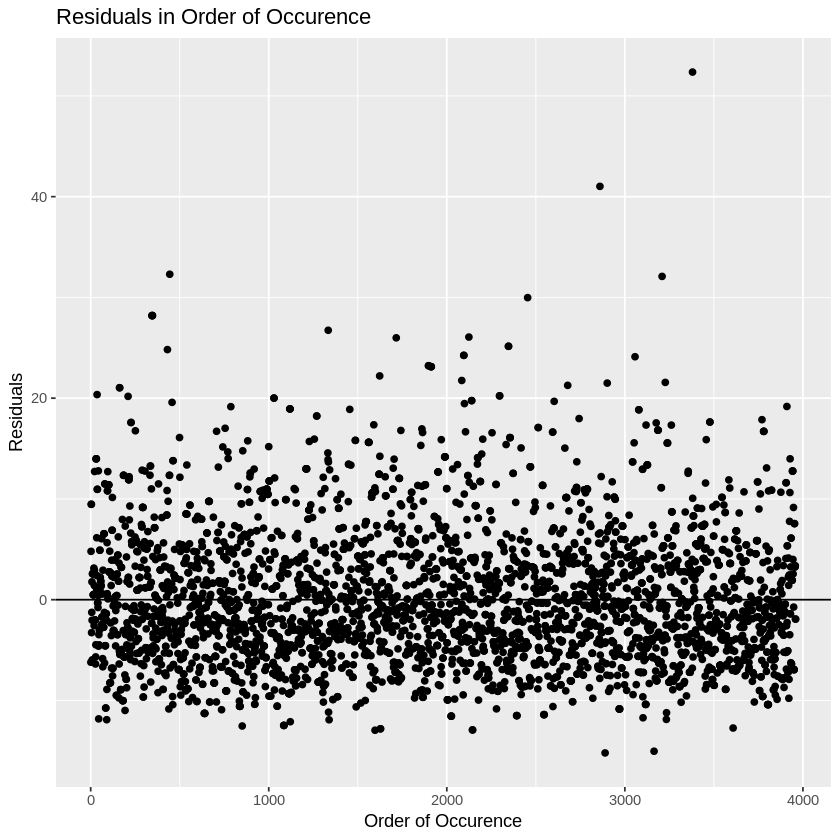

In [25]:
model1 %>%
  fortify(model1$model) %>%
  mutate(row = row_number()) %>%
  ggplot(aes(x = row,
             y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(x = "Order of Occurence",
       y = "Residuals",
       title = "Residuals in Order of Occurence")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


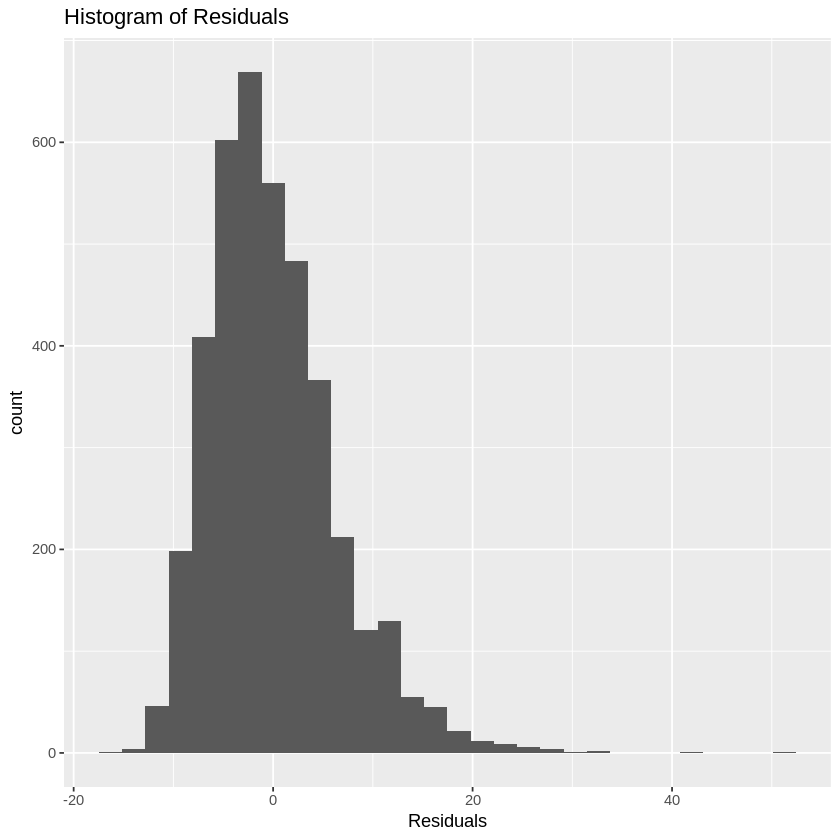

In [26]:
model1 %>%
  fortify(model1$model) %>%
  ggplot(aes(x = .resid)) +
  geom_histogram() +
  labs(x = "Residuals",
       title = "Histogram of Residuals")

In [27]:
model2 <- lm(BMI ~ TVHrsDay*TotChol + BPSysAve + BPDiaAve, data=df)
summary(model2)


Call:
lm(formula = BMI ~ TVHrsDay * TotChol + BPSysAve + BPDiaAve, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.231  -4.594  -1.014   3.455  51.990 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               18.491483   3.559756   5.195 2.16e-07 ***
TVHrsDay0_to_1_hr         -8.604532   3.731905  -2.306   0.0212 *  
TVHrsDay1_hr              -8.854393   3.710623  -2.386   0.0171 *  
TVHrsDay2_hr              -3.948476   3.616497  -1.092   0.2750    
TVHrsDay3_hr              -5.469348   3.661168  -1.494   0.1353    
TVHrsDay4_hr              -5.196175   3.779281  -1.375   0.1692    
TVHrsDayMore_4_hr         -2.298103   3.706174  -0.620   0.5352    
TotChol                   -1.061027   0.712792  -1.489   0.1367    
BPSysAve                   0.058527   0.006776   8.637  < 2e-16 ***
BPDiaAve                   0.093827   0.008110  11.569  < 2e-16 ***
TVHrsDay0_to_1_hr:TotChol  1.663981   0.760991   2.187   0.

In [34]:
df %>% count(TVHrsDay)

TVHrsDay,n
<fct>,<int>
0_hrs,84
0_to_1_hr,491
1_hr,699
2_hr,1013
3_hr,706
4_hr,438
More_4_hr,528


In [28]:
model3 <- lm(BMI ~ TotChol + BPSysAve + BPDiaAve, data=df)
summary(model3)


Call:
lm(formula = BMI ~ TotChol + BPSysAve + BPDiaAve, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.925  -4.600  -1.075   3.495  50.923 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.346321   0.804565  15.345   <2e-16 ***
TotChol      0.242762   0.101863   2.383   0.0172 *  
BPSysAve     0.069084   0.006773  10.200   <2e-16 ***
BPDiaAve     0.085079   0.008151  10.438   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.515 on 3955 degrees of freedom
Multiple R-squared:  0.09547,	Adjusted R-squared:  0.09479 
F-statistic: 139.1 on 3 and 3955 DF,  p-value: < 2.2e-16


In [29]:
model4 <- lm(BMI ~ BPSysAve + BPDiaAve, data=df)
summary(model4)


Call:
lm(formula = BMI ~ BPSysAve + BPDiaAve, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.884  -4.581  -0.993   3.472  51.075 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.984712   0.759112   17.11   <2e-16 ***
BPSysAve     0.071412   0.006706   10.65   <2e-16 ***
BPDiaAve     0.088923   0.007994   11.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.519 on 3956 degrees of freedom
Multiple R-squared:  0.09417,	Adjusted R-squared:  0.09371 
F-statistic: 205.6 on 2 and 3956 DF,  p-value: < 2.2e-16


In [30]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
# Load the stargazer package
library(stargazer)

# Use stargazer to compare them
stargazer(model1, model3, model4,
          type = "text",      # Use "html" or "latex" for publication-ready output
          title = "Comparison of Linear Models",
          align = TRUE,
          column.labels = c("Model 1", "Model 3", "Model 4"),
          omit.stat = c("f", "ser"))  # Omit some stats if you want a cleaner table


Comparison of Linear Models
                       Dependent variable:     
                  -----------------------------
                               BMI             
                   Model 1   Model 3   Model 4 
                     (1)       (2)       (3)   
-----------------------------------------------
TVHrsDay0_to_1_hr  -0.614                      
                   (0.761)                     
                                               
TVHrsDay1_hr       -0.416                      
                   (0.744)                     
                                               
TVHrsDay2_hr        0.533                      
                   (0.731)                     
                                               
TVHrsDay3_hr       1.604**                     
                   (0.744)                     
                                               
TVHrsDay4_hr       1.567**                     
                   (0.768)                     
           